In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [109]:
file = r"C:\Users\Heba A\Desktop\Mini-Project sem 2\Mini Project Final\training_data_2_csv_UTF.csv"
training_data = pd.read_csv(file)
print(training_data.columns)
# contains bot accounts
bots = training_data[training_data.bot==1]
# COntains real accounts
nonbots = training_data[training_data.bot==0]

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')


### EDA

IDentify Missing Values

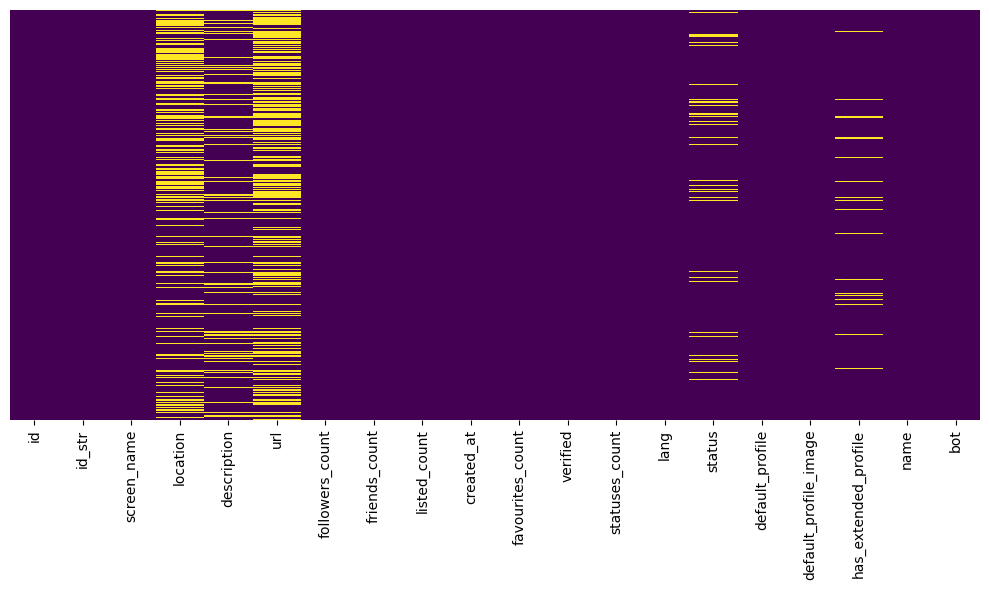

In [110]:
# THis function is used to viz Nan values using heatmap
def get_heatmap(df):
    plt.figure(figsize=(10,6))
    # df.isnull():  creates a table of True (if a value is missing) and False (if not).
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(training_data)

# location, description and url have more missing values

This code is comparing bots and non-bots by plotting their friends count vs. followers count  
Created 2 scatter plots, one for bits and one for not bots  
x-axis: friend_count  
y-axis: follower-count  

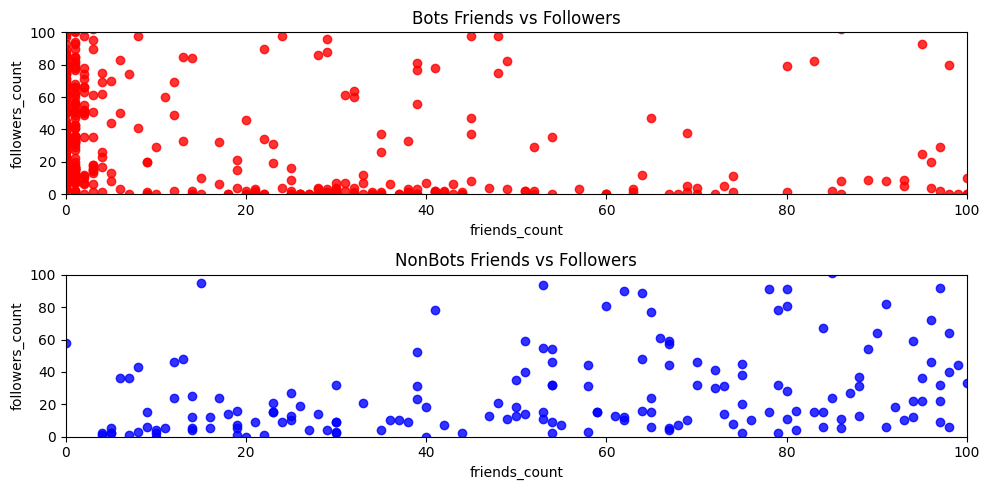

In [111]:
# bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
# Divides the figure into 2 rows, 1 column, and selects the first plot area.
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
# drawing a scatter plot with the best fit line
sns.regplot(x=bots.friends_count, y=bots.followers_count, color='red', label='Bots')

# Limits both axes from 0 to 100 to zoom in and focus on users with small follower/friend counts.
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout() #Adjusts spacing to avoid overlap.

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(x=nonbots.friends_count, y=nonbots.followers_count, color='blue', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

Observation:   
graph 1: Many bots follow a lot of users but have few followers in return.  
graph 2: evenly distributed

(504, 20)


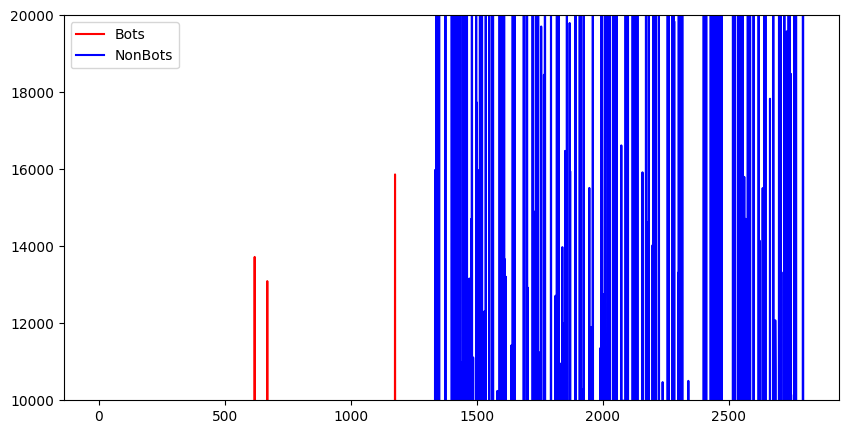

In [112]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='red', label='Bots')
plt.plot(nonbots.listed_count, color='blue', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,20000)
print(bots[(bots.listed_count<5)].shape)

Observation: Bots have low listed_count -- very few people have added them to lists -- not genuine

Analyzing bot behavior using listed_count, verified, and whether their screen name contains the word "bot"

In [113]:
# removing outliers: verified celeb

# here listed_count means you are a prat of some group -- this is a good thing
# because bots are moe likely to be isolated and not be part of groups
bots_listed_count_df = bots[bots.listed_count<16000]
#  for non-bots, take accounts that have less listed_count -- probable bots
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

# get bots/accounts that do not have blue tick --- because bots generally dont have blue ticks
bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]

# now i have unverified bots
# count how many of them have the word "bot" in their name
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

In [114]:
# plt.figure(figsize=(12,7))

# # 2 rows, 1 column, and plot in the first row
# plt.subplot(2,1,1)

# # Red: how many accounts bots follow
# # Blue: how many accounts nonbots follow
# plt.plot(bots_listed_count_df.friends_count, color='red', label='Bots Friends')
# plt.plot(nonbots_listed_count_df.friends_count, color='blue', label='NonBots Friends')
# plt.legend(loc='upper left')

# plt.subplot(2,1,2)
# # Red line: followers of bots
# # Blue line: followers of nonbots
# plt.plot(bots_listed_count_df.followers_count, color='red', label='Bots Followers')
# plt.plot(nonbots_listed_count_df.followers_count, color='blue', label='NonBots Followers')
# plt.legend(loc='upper left')

comparing bots and nonbots based on their friends_count and followers_count

Top plot: Compares how many users each group follows (friends_count)

Bottom plot: Compares how many followers they have (followers_count)  
bots have unnatural patters, either very low or very high

From the second graph: 
blue lines show bots follow a lot of accounts to appear active

In [115]:
#bots[bots.listedcount>10000]
# checking 4 conditions: most likely for not accounts
# 1. name has "bot"
# 2. desc had "bot"
# 3. have not added their location
# 4. account is not verified
condition = (
    (bots.screen_name.str.contains("bot", case=False) == True) |
    (bots.description.str.contains("bot", case=False) == True) |
    (bots.location.isnull()) |
    (bots.verified == False)
)


# creating 3 columns
# 1. screen_name_binary: 1 if "bot" appears in screen name, else 0
# 2. location_binary: 1 if location is missing, else 0
# 3. verified_binary: 1 if not verified, else 0
bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

(1321, 23)

Same binary feature engg for nonbots. opposite of prev step

In [116]:
condition = (
    (nonbots.screen_name.str.contains("bot", case=False) == False) |
    (nonbots.description.str.contains("bot", case=False) == False) |
    (nonbots.location.isnull() == False) |
    (nonbots.verified == True)
)

nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (nonbots.location.isnull()==False)
nonbots['verified_binary'] = (nonbots.verified==True)

nonbots.shape

(1476, 23)

In [117]:
# combining the bots and nonbots data into a single dataset
df = pd.concat([bots, nonbots])
df.shape

(2797, 23)

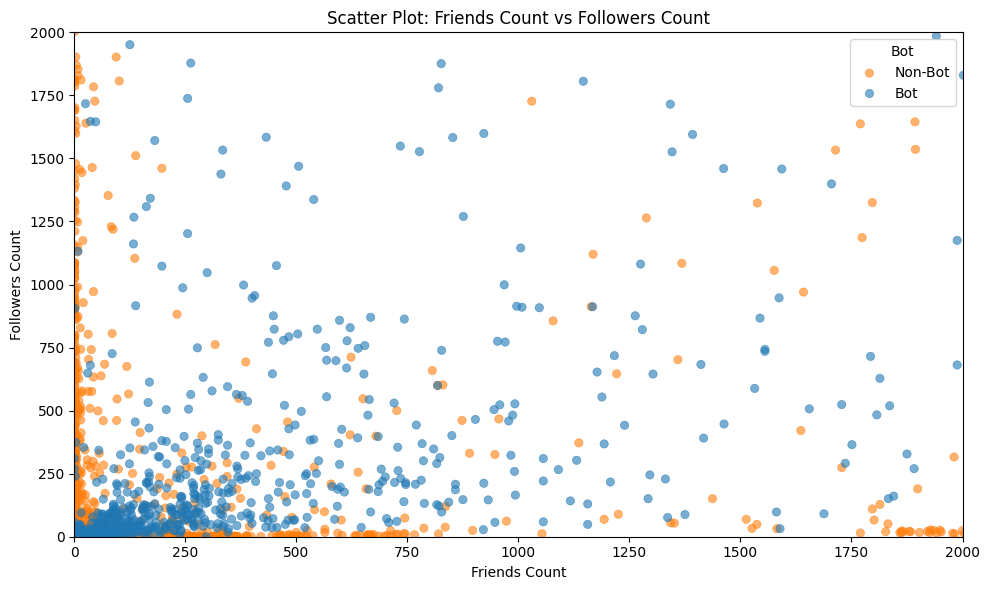

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='friends_count', y='followers_count', hue='bot', alpha=0.6, edgecolor=None)
plt.title("Scatter Plot: Friends Count vs Followers Count")
plt.xlabel("Friends Count")
plt.ylabel("Followers Count")
plt.legend(title='Bot', labels=['Non-Bot', 'Bot'])
plt.xlim(0, 2000)      
plt.ylim(0, 2000)
plt.tight_layout()
plt.show()



OBSERVATION:  
Orange: non - bots: very scattered -- organic behaviour  
Blue: bots: more grouped -- no regular patters

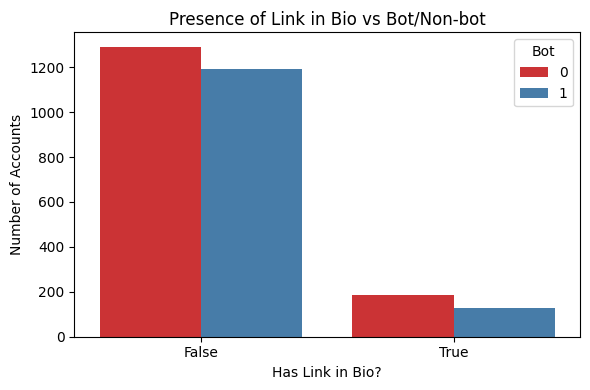

In [119]:

# Check if 'http' is in the description - link is generally in bots' accoutns
df['has_link_in_bio'] = df['description'].str.contains("http", case=False, na=False)

# Plot the distribution of bots vs non-bots having links in bio
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='has_link_in_bio', hue='bot', palette='Set1')
plt.title('Presence of Link in Bio vs Bot/Non-bot')
plt.xlabel('Has Link in Bio?')
plt.ylabel('Number of Accounts')
plt.legend(title='Bot')
plt.tight_layout()
plt.show()

# Having a link in bio is not a strong standalone indicator of a bot.

Most accounts, both bots and non-bots, do not have a link in their bio.  
But proportionally, bots are slightly more likely to include a link than non-bots.  
This makes sense: bots often include malicious or promotional links in bios.

In [120]:
# # X-axis = Number of tweets (from 0 to ~5000)
# # Y-axis = Number of accounts with that many tweets

# # Blue bars = Non-bots (bot = 0)
# # Orange bars = Bots (bot = 1)
# # Grey bars = Overlap (both bot and non-bot accounts fall in that bin)



# plt.figure(figsize=(10, 5))

# sns.histplot(data=df[df["statuses_count"] < 5000], x="statuses_count", hue="bot", bins=50)

# plt.title("Distribution of Statuses Count (Tweets)")
# plt.xlabel("Number of Tweets (statuses_count)")
# plt.ylabel("Count")
# plt.legend()
# plt.tight_layout()
# plt.show()


1. Most accounts (both bots and nonbots) have low tweet counts
(Because the line is the longest in the beginning)
2. Bots are more concentrated at low tweet counts (first bar has larger orange portion)
3. TNon-bots have a wider range. Blue bars are more spread out

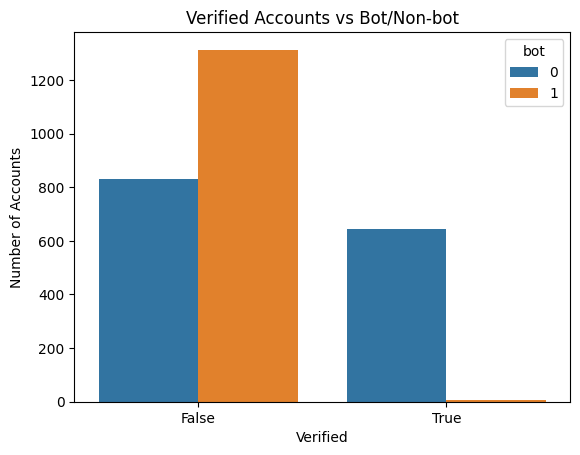

In [ ]:
sns.countplot(data=df, x="verified", hue="bot")
plt.title("Verified Accounts vs Bot/Non-bot")
plt.xlabel("Verified")
plt.ylabel("Number of Accounts")
plt.show()

# False: Unverified acc
# True: Verified acc

# Most bots are not verified, so verification status is a useful feature in bot detection.
# orange: bots --- almost all not verified


FEATURE ENGG/EXTRACTION

In [143]:

file = r"C:\Users\Heba A\Desktop\Mini-Project sem 2\Mini Project Final\training_data_2_csv_UTF.csv"
training_data = pd.read_csv(file)
print(training_data.columns)
# training_data = pd.read_csv(file)

# these are words generallly found in bot accoutts
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|bbb|XXX|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
# check whether screen_name, name, description, or status contains any of the suspicious words from the bag_of_words_bot
# create new col:
                # true: if word exists
                # false: if word does not exist
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)
print(training_data.columns)

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')
Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot', 'screen_name_binary', 'name_binary',
       'description_binary', 'status_binary'],
      dtype='object')


In [123]:
# creating a new binary column named: listed_count_binary
# If listed_count is 20,000 or less → True
# If listed_count is more than 20,000 → False

# Extremely high listed_count values might indicate verified or famous users.
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False

# selecting features
# here target is "bot"
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

## Implementing Different Models

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# classification_report: shows precision, recall, F1-score.
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1] #last col

log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

log_reg.fit(X_train, y_train)

y_pred_lr  = log_reg.predict(X_test)

# returns the probability that each test sample belongs to class 0 or class 1.
# [:, 1] means -- For all rows, select only the second column (i.e, probability of class 1, which in your case = bot).

# here final result will be a list of predicted probabilities that each user is a bot (class 1).
#  this measure will be used in ROC-AUC -- becuase it is a probability measure, it is a good measure for ROC-AUC.
# ROC-AUC needs probability to check precision
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))


# result analysis for class 0 (Non-bots)
# Precision: 0.90 -- Of all predicted as class 0, 90% were actually class 0
# Recall:    0.46 -- Of all real class 0, only 46% were correctly predicted
# F1-score:  0.61 -- Balance between precision and recall
# Support:   423   -- Number of actual class 0 examples in the test set

# model often labels humans as bots (many false positives), causing low recall for class 0.

# result analysis for class 1 (bots)
# Precision: 0.63  -- Of all predicted as class 1 (bots), 63% were correct
# Recall:    0.95  -- Of all actual bots, 95% were caught
# F1-score:  0.76  -- Strong performance overall for bots
# Support:   417   -- Number of actual class 1 examples in the test set

# RESULTt
# model is good at catching bots (high recall), but not always precise (some humans are wrongly labeled as bots).


# OVERALL ACCURACY IS 70%

# CONFUSION MATRIX
# 195 true humans were predicted as human -- (True Negative)
# 228 humans wrongly predicted as bots -- (False Positive)
# 395 bots correctly predicted as bots -- (True Positive)
# 22 bots wrongly predicted as human -- (False Negative)

Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.46      0.61       423
           1       0.63      0.95      0.76       417

    accuracy                           0.70       840
   macro avg       0.77      0.70      0.68       840
weighted avg       0.77      0.70      0.68       840

Confusion matrix:
 [[195 228]
 [ 22 395]]
ROC‑AUC: 0.749647090837968


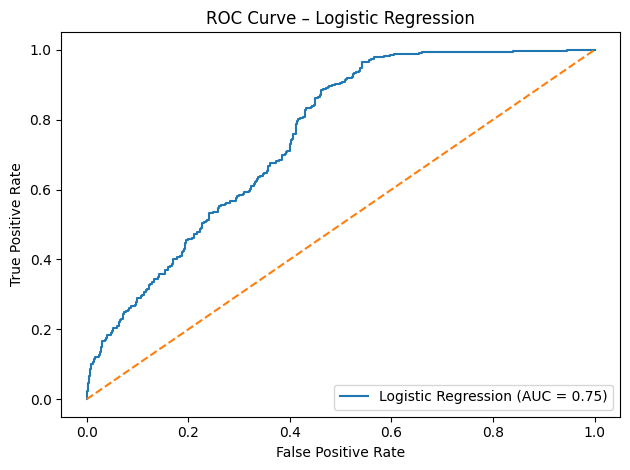

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')   # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# since auc is >0.5-- model is fairly well

### XGBoost
XGBoost builds an ensemble (a group) of decision trees, but not all at once. Instead, it builds them one by one, where:
Each new tree learns from the errors of the previous trees.
The goal is to correct the mistakes made earlier.

This process is called boosting.

In [126]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb = XGBClassifier(
    objective="binary:logistic", #binary classification
    eval_metric="logloss", #this is the eval metric used while training
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,  #get random sample for training which is 80%
    colsample_bytree=0.8, # using 80% of sample while training 
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb  = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC‑AUC:", roc_auc_score(y_test, y_proba_xgb))


# Clss 0 (non-bot)
# Precision: 0.88 -- Of all predicted as class 0, 88% were actually class 0  
# Recall:    0.91  --Of all actual class 0 users, 91% were correctly identified  
# F1-score:  0.89 -- Good balance between precision and recall  
# Support:   423   --There were 423 actual human users in the test set

# Class 1 (bots)
# Precision: 0.90 -- Of all predicted as bots, 90% were correct  
# Recall:    0.88 -- Of all actual bots, 88% were correctly identified  
# F1-score:  0.89 -- Strong balanced performance  
# Support:   417  -- There were 417 actual bot accounts in the test set


# OVERALL ACCURACY
# accuracy: 0.89 → 89% of total predictions were correct

# CONFUSION MATRIX
# 383 true humans correctly classified (True Negatives)
# 40 humans incorrectly classified as bots (False Positives)
# 367 bots correctly classified as bots (True Positives)
# 50 bots incorrectly classified as humans (False Negatives)


# ROC-AUC: The ROC-AUC score of 0.96 indicates excellent separation ability between bots and humans.




XGBoost
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       423
           1       0.91      0.88      0.89       417

    accuracy                           0.89       840
   macro avg       0.89      0.89      0.89       840
weighted avg       0.89      0.89      0.89       840

Confusion matrix:
 [[385  38]
 [ 51 366]]
ROC‑AUC: 0.9578181426490014


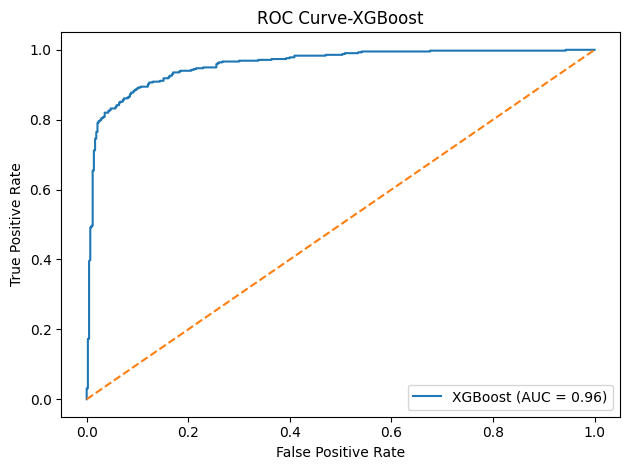

In [127]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-XGBoost')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### creating multilayer using networkx

Users -- from your dataset (id, screen_name, etc.)
Tweets-- from the status column (text of each user's post)

connection here is: Each user to the tweet they posted. 

In [128]:
import networkx as nx
import pandas as pd

# Create a new empty undirected graph
G = nx.Graph()

# 1. Add user nodes
# Loop through each row in the DataFrame to extract user info

for idx, row in training_data.iterrows():
    user_id = row['id'] #take user ID 
    user_node = f"user_{user_id}"  # add "user_" prefix to id 

    # Add user node with attributes
    G.add_node(
        user_node,
        layer='user',                         # telling that this is suer layer
        screen_name=row['screen_name'],       # username
        bot=row['bot'],                       # bot label (0 or 1)
        verified=row['verified'],             # verification status
        followers=row['followers_count'],     # number of followers
        friends=row['friends_count']          # number of friends
    )

# 2. Adding tweet nodes and interlayer edges (user to tweet)
# Each row has a 'status' — the text of the latest tweet

# again for each row, get userid
for idx, row in training_data.iterrows():
    user_id = row['id']
    user_node = f"user_{user_id}"

    #  is status column is not empty -- means user has tweeted
    if pd.notnull(row['status']):  
        # create a tweet node using the "tweet_" prefix and the row number (idx)
        tweet_node = f"tweet_{idx}"  

        # Add tweet node -- layer: tweet layer -- content: actual tweet content(status)
        G.add_node(tweet_node, layer='tweet', text=row['status'])

        # Add interlayer edge: user → tweet
        # this user has posted this tweet
        # the label for edges is "posted"
        G.add_edge(user_node, tweet_node, type='posted')


In [129]:
# Print total number of nodes and edges
print("Total nodes:", G.number_of_nodes())
print("Total edges:", G.number_of_edges())

# Print sample nodes with attributes
print("\nSample nodes:")
for node, data in list(G.nodes(data=True))[:5]:
    print(f"{node}: {data}")

# Print sample edges with types
print("\nSample edges:")
for u, v, d in list(G.edges(data=True))[:5]:
    print(f"{u} → {v}, type: {d['type']}")


Total nodes: 4854
Total edges: 2461

Sample nodes:
user_8.16e+17: {'layer': 'user', 'screen_name': 'ShamielAlli', 'bot': 1, 'verified': False, 'followers': 1, 'friends': 42}
user_4843621225.0: {'layer': 'user', 'screen_name': 'kernyeahx', 'bot': 1, 'verified': False, 'followers': 1, 'friends': 349}
user_4303727112.0: {'layer': 'user', 'screen_name': 'mattlieberisbot', 'bot': 1, 'verified': False, 'followers': 1086, 'friends': 0}
user_3063139353.0: {'layer': 'user', 'screen_name': 'sc_papers', 'bot': 1, 'verified': False, 'followers': 33, 'friends': 0}
user_2955142070.0: {'layer': 'user', 'screen_name': 'lucarivera16', 'bot': 1, 'verified': False, 'followers': 11, 'friends': 745}

Sample edges:
user_8.16e+17 → tweet_0, type: posted
user_8.16e+17 → tweet_749, type: posted
user_8.16e+17 → tweet_806, type: posted
user_4303727112.0 → tweet_2, type: posted
user_3063139353.0 → tweet_3, type: posted


In [130]:
# Create a subgraph based on actual user→tweet edges
posted_edges = [
    (u, v) for u, v, d in G.edges(data=True)
    if d.get('type') == 'posted'
]

import random
sample_edges = random.sample(posted_edges, 50)  # 50 edges for better structure

# Get nodes involved in those edges
sample_nodes = set()
for u, v in sample_edges:
    sample_nodes.add(u)
    sample_nodes.add(v)

# Build the actual subgraph
G_small = G.subgraph(sample_nodes).copy()

# Check if it has edges
print("Number of nodes:", G_small.number_of_nodes())
print("Number of edges:", G_small.number_of_edges())


Number of nodes: 97
Number of edges: 50


In [131]:
import re

mention_edges = []

# Loop through each tweet
for idx, row in training_data.iterrows():
    user_id = row['id']
    user_node = f"user_{user_id}"
    
    if pd.notnull(row['status']):
        # if the tweet contains any mentions in "status" column
        # checking all words atarting with @ for mentions
        mentions = re.findall(r'@(\w+)', row['status']) 
        
        for mentioned_screen_name in mentions:
            # checking if the mentioned user is present in the users list
            mentioned_rows = training_data[training_data['screen_name'].str.lower() == mentioned_screen_name.lower()]
            
            # if the user exists:
            if not mentioned_rows.empty:
                # get id of the mentioned user  
                mentioned_id = mentioned_rows.iloc[0]['id']
                mentioned_node = f"user_{mentioned_id}"
                
                # Add user-to-user edge: edge from the usr (who tweeted) -- mentioned user
                G.add_edge(user_node, mentioned_node, type='mention')

print("Total nodes:", G.number_of_nodes())
print("Total edges:", G.number_of_edges())


Total nodes: 4854
Total edges: 2624


User-user graph nodes: 195
User-user graph edges: 163


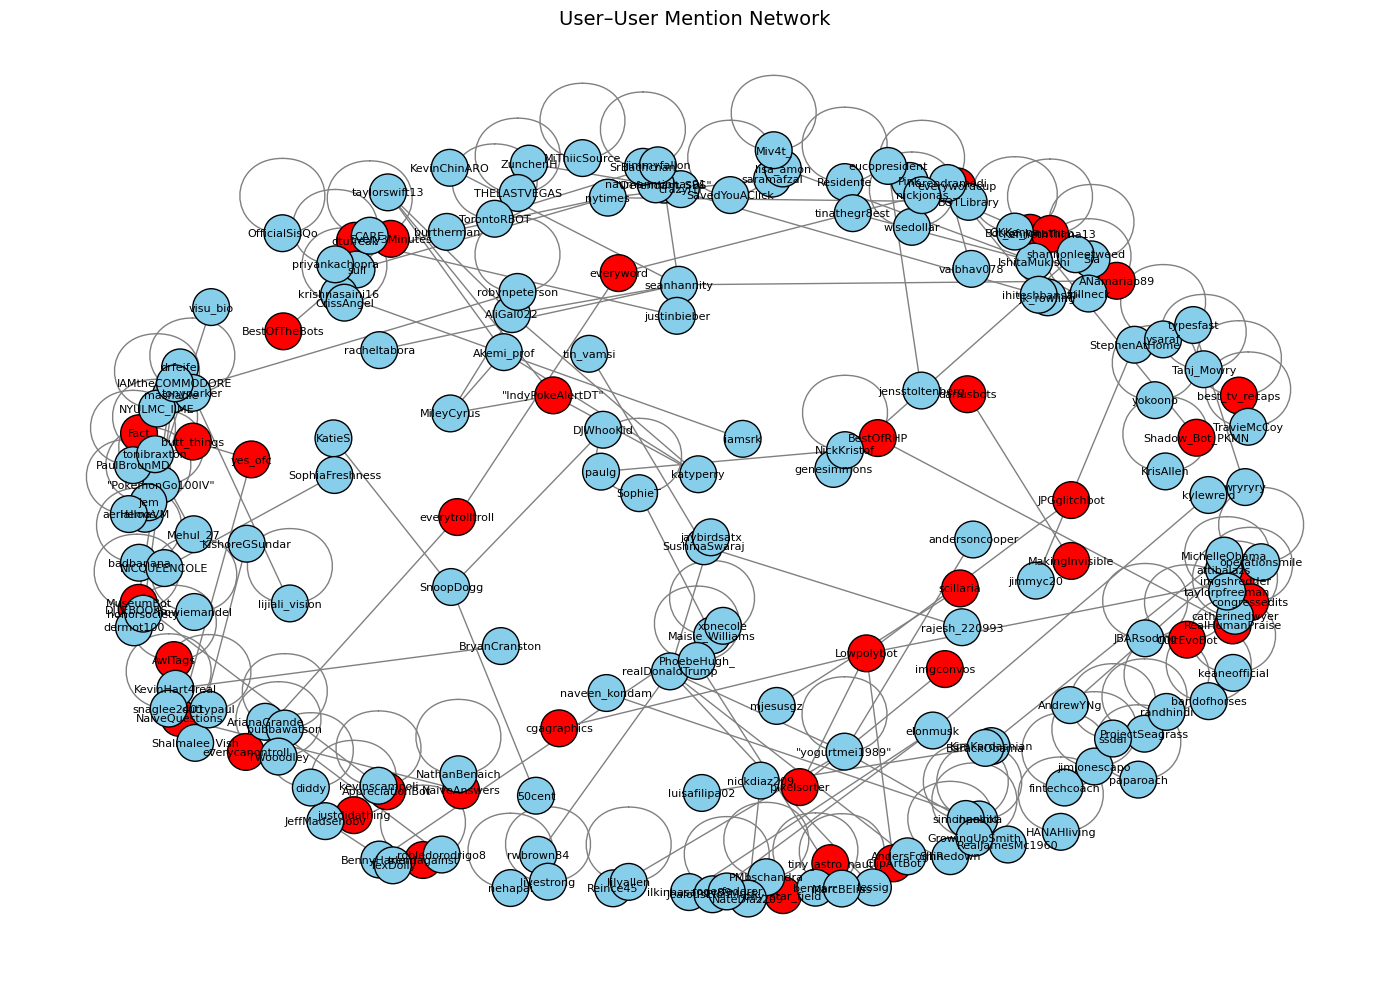

In [132]:
import networkx as nx
import matplotlib.pyplot as plt

# 1: getting user-user edge only where mentions is present
# here edge is a tuple (user, user)
mention_edges = [
    (u, v) for u, v, d in G.edges(data=True)
    if d.get('type') == 'mention'
]

# 2: Building the user-user graph from those edges
# nodes -- users
# edges -- mentions
G_useruser = nx.Graph()
G_useruser.add_edges_from(mention_edges)

# Adding user node attributes from G (bot label, screen_name)
for node in G_useruser.nodes:
    if node in G.nodes:
        G_useruser.nodes[node].update(G.nodes[node])

# the number of edges and nodes
print("User-user graph nodes:", len(G_useruser.nodes))
print("User-user graph edges:", len(G_useruser.edges))

# 3: Assigning color based on bot label
# bot -- red
# human -- blue
node_colors = []
for n in G_useruser.nodes:
    if G_useruser.nodes[n].get('bot') == 1:
        node_colors.append('red')       
    else:
        node_colors.append('skyblue')   

# 4: Draw the user-user network (14*10 inches)
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_useruser, seed=42, k=0.5)

# grey edges
nx.draw_networkx_edges(G_useruser, pos, edge_color='gray', width=1)
# drawing @mention edges
nx.draw_networkx_nodes(G_useruser, pos, node_color=node_colors, node_size=700, edgecolors='black')

# Adding screen names as labels
labels = {n: G_useruser.nodes[n].get('screen_name', '') for n in G_useruser.nodes}
nx.draw_networkx_labels(G_useruser, pos, labels=labels, font_size=8)

plt.title("User–User Mention Network", fontsize=14)
plt.axis('off')
plt.tight_layout() #removing padding and margin
plt.show()


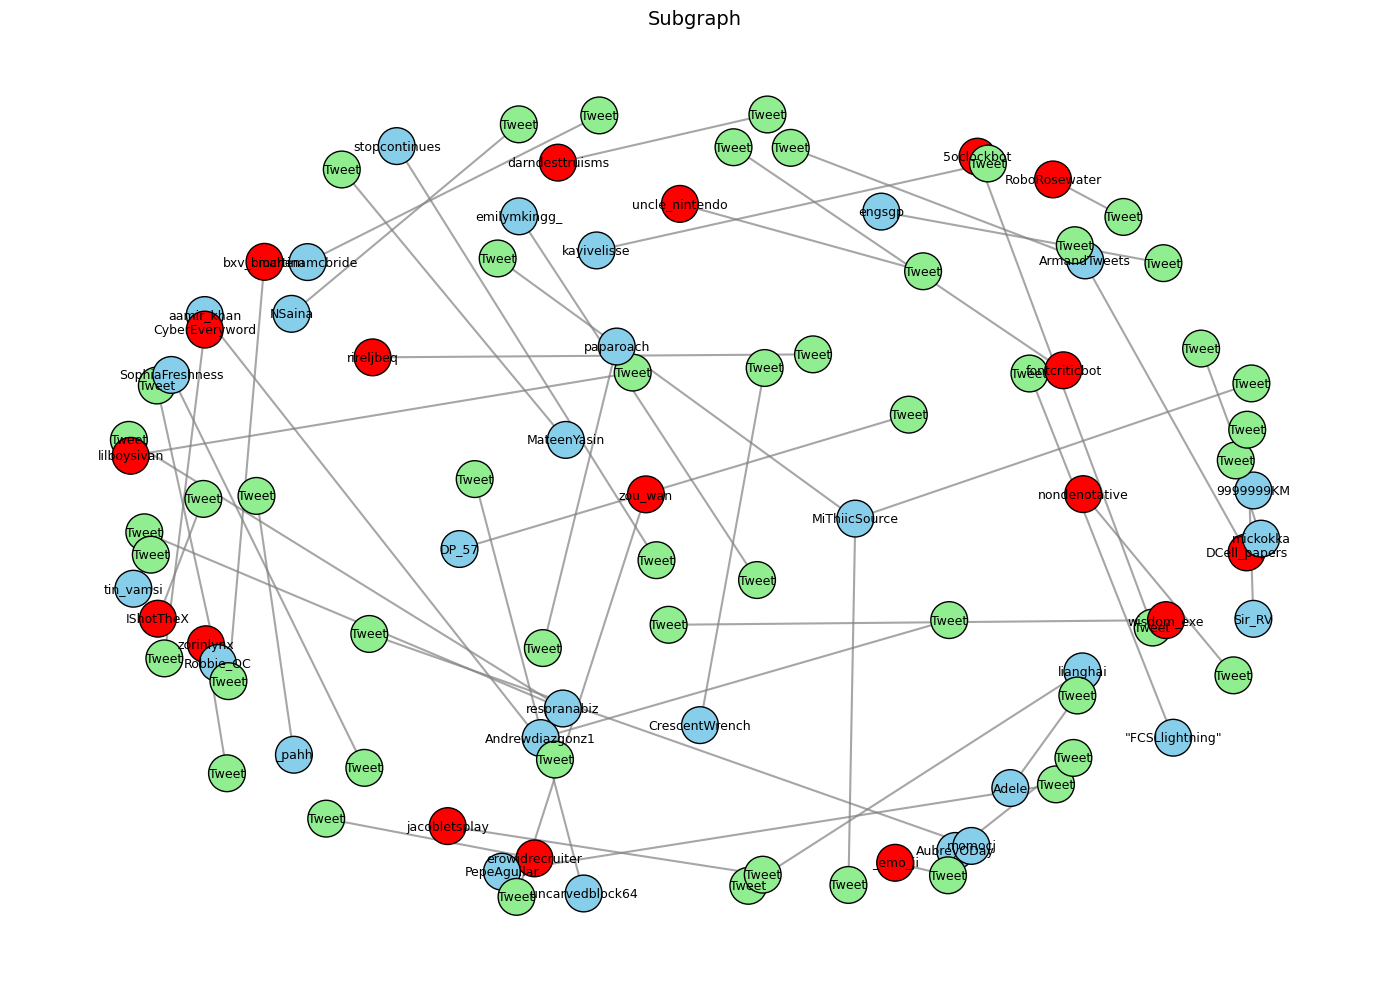

In [133]:
import matplotlib.pyplot as plt
import networkx as nx


plt.figure(figsize=(14, 10))

# creating spring-like layout
# seed: same position everytime i run the code
# k: how spread out the nodes will be
pos = nx.spring_layout(G_small, seed=42, k=0.8)

# 1: Define node colors 
# tweet-- light green
# bot-- red
# human-- sky blue
node_colors = []
for n in G_small.nodes:
    layer = G_small.nodes[n]['layer']
    if layer == 'tweet':
        node_colors.append('lightgreen')      
    elif G_small.nodes[n]['bot'] == 1:
        node_colors.append('red')             
    else:
        node_colors.append('skyblue')         

# 2: Drawing edges
nx.draw_networkx_edges(
    G_small, pos,
    edge_color='gray',   #edge color
    width=1.5,
    alpha=0.7            #making it little transparent
)

# 3: Drawing nodes with correct colors
nx.draw_networkx_nodes(
    G_small, pos,
    node_color=node_colors, #node color
    node_size=700,
    edgecolors='black'   # outline
)

# 4: Drawing labels
#  of it is a user-- show the sreen_name
#  if it is a tweet-- tweet
labels = {
    n: G_small.nodes[n].get('screen_name', 'Tweet') if G_small.nodes[n]['layer'] == 'user' else 'Tweet'
    for n in G_small.nodes
}
nx.draw_networkx_labels(G_small, pos, labels=labels, font_size=9)

# 5: Show the plot
plt.title("Subgraph", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


Detected 112 communities.


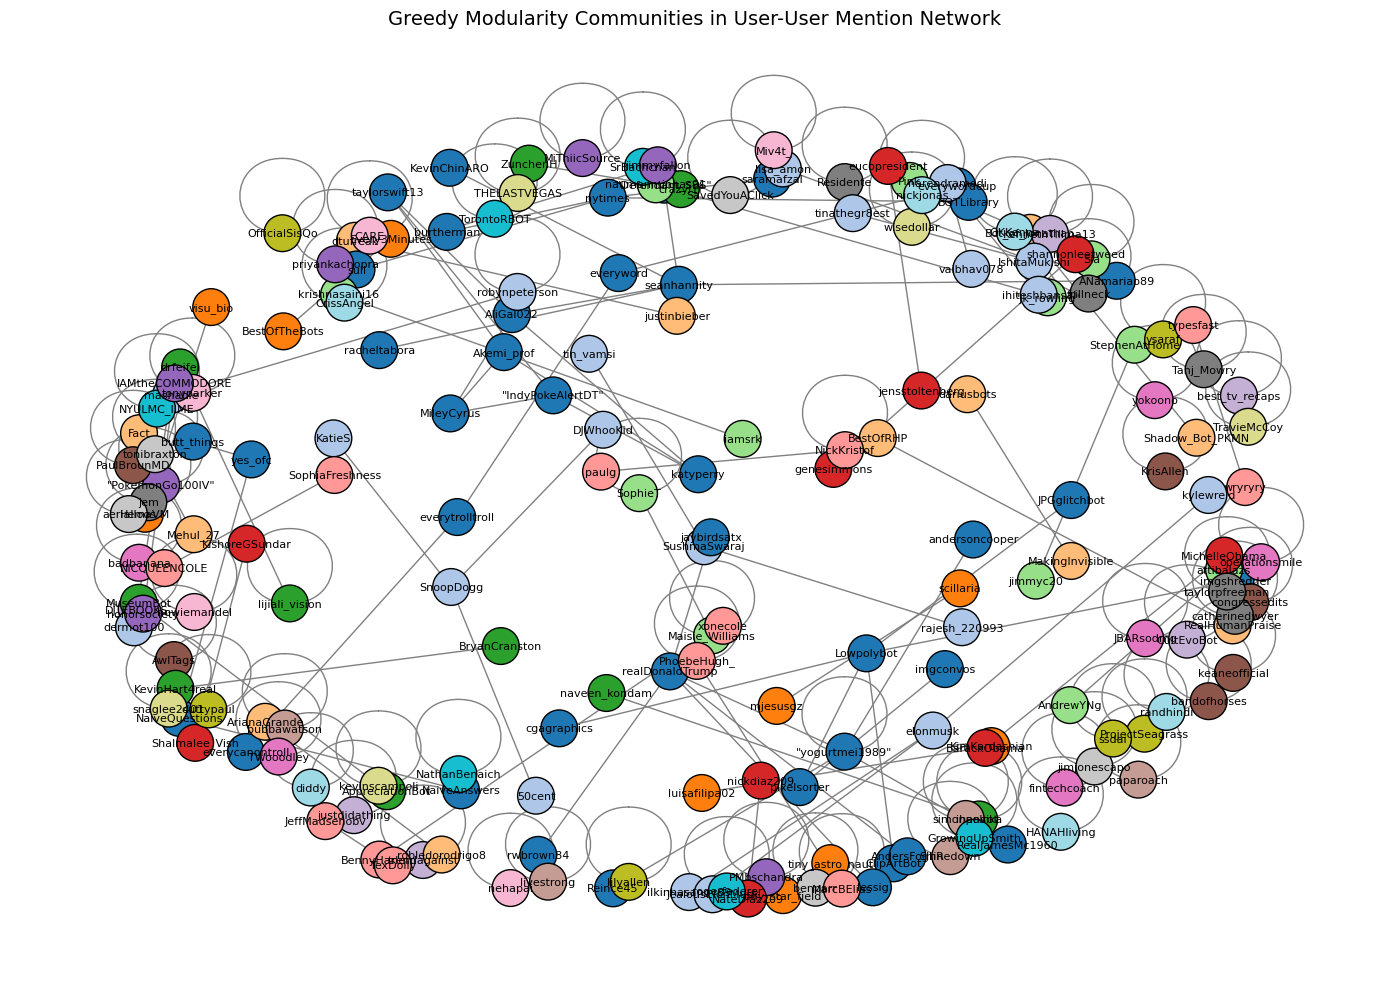

In [134]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities #community detection algo
import matplotlib.cm as cm # color mapping different communities

# 1: Extract user–user mention edges from G (main graph)
# hre connection type is @mention -- means only edges are taken where one user has mentioned another
mention_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'mention']

# 2: Building the user–user graph -- initially it is empty
G_useruser = nx.Graph()
# adding mention edges -- graph has user and mentions
G_useruser.add_edges_from(mention_edges)

# Copy user node attributes from G
for node in G_useruser.nodes:
    if node in G.nodes:
        G_useruser.nodes[node].update(G.nodes[node])

# 3: Run greedy modularity community detection 
#  this goups users based on how much they mention each other
# creating a list of ommunity
communities = list(greedy_modularity_communities(G_useruser))
print(f"Detected {len(communities)} communities.")

# 4: Assign community ID to each node 
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        # assign community id for eachuser
        node_community_map[node] = i
# saving this id in node attribute called "community"
nx.set_node_attributes(G_useruser, node_community_map, "community")

# 5: Visualizing the communities
plt.figure(figsize=(14, 10))
# spread nodes like a spring
pos = nx.spring_layout(G_useruser, seed=42, k=0.5)

# Assigning color to each community
# getting a color palette with 20 different colors
cmap = cm.get_cmap('tab20', len(communities))
# for each community id, assign a unique color
node_colors = [cmap(node_community_map[n]) for n in G_useruser.nodes]

# Drawing graph -- edges showing mentions between users
nx.draw_networkx_edges(G_useruser, pos, edge_color='gray', width=1)
# drawing user nodes -- also color-coded
nx.draw_networkx_nodes(G_useruser, pos, node_color=node_colors, node_size=700, edgecolors='black')

# adding screen name labels
labels = {n: G_useruser.nodes[n].get('screen_name', '') for n in G_useruser.nodes}
nx.draw_networkx_labels(G_useruser, pos, labels=labels, font_size=8)

plt.title("Greedy Modularity Communities in User-User Mention Network", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


taking a mention network of users (who mentioned whom in tweets), detecting communities, coloring bots, and finding top users in each group.

Detected 112 communities.


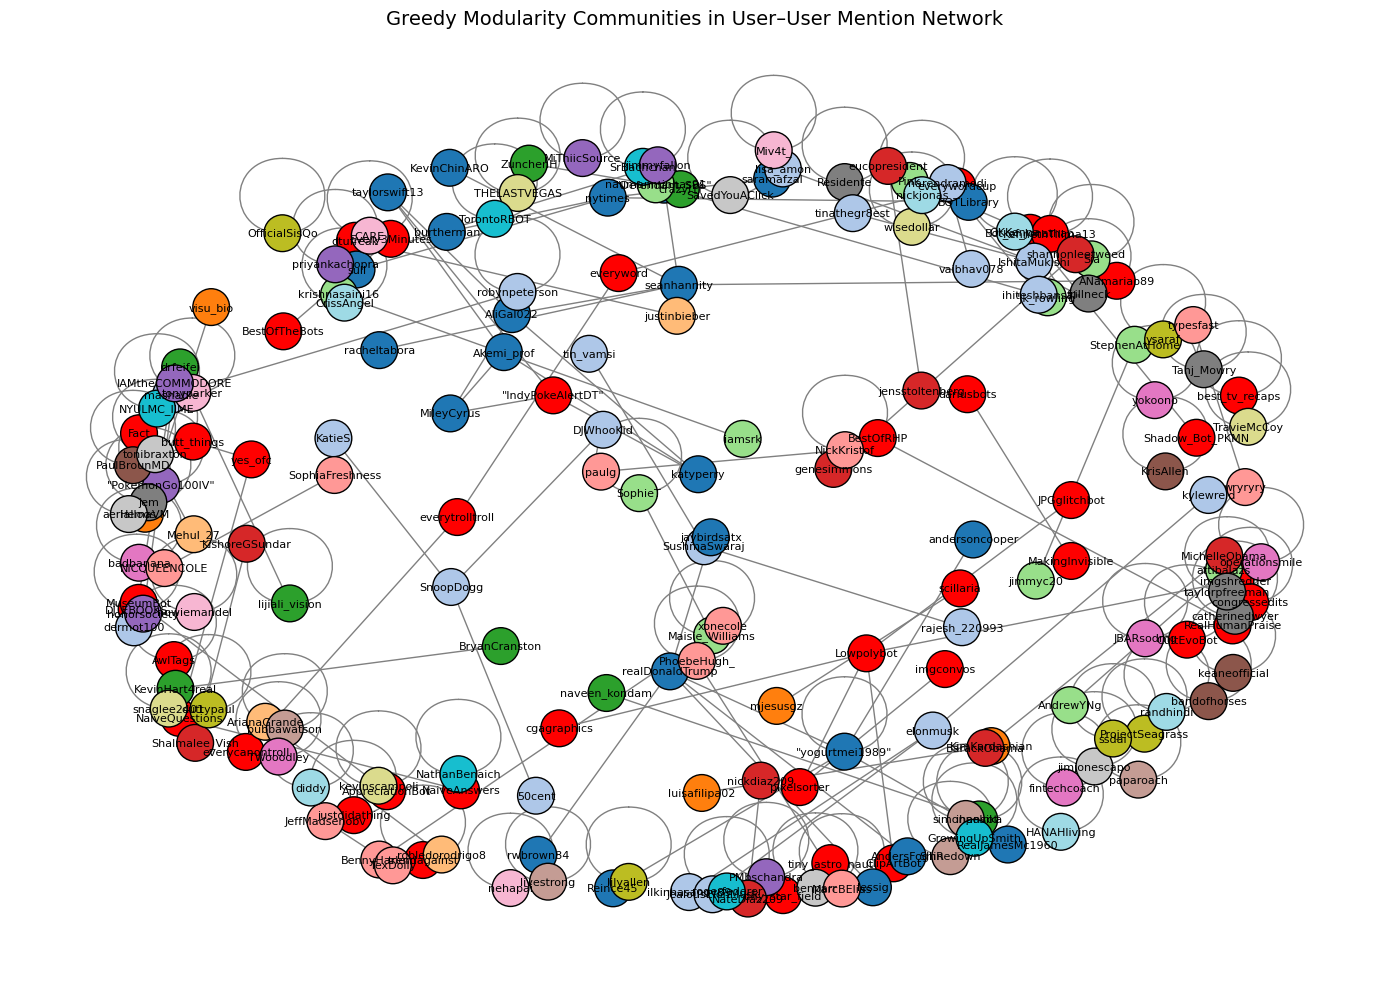


Bot distribution by community:
  Community 0: 2 bots / 11 users
  Community 1: 0 bots / 9 users
  Community 2: 7 bots / 7 users
  Community 3: 0 bots / 5 users
  Community 4: 4 bots / 4 users
  Community 5: 4 bots / 4 users
  Community 6: 0 bots / 4 users
  Community 7: 0 bots / 4 users
  Community 8: 0 bots / 3 users
  Community 9: 0 bots / 3 users
  Community 10: 0 bots / 3 users
  Community 11: 0 bots / 3 users
  Community 12: 2 bots / 2 users
  Community 13: 1 bots / 2 users
  Community 14: 0 bots / 2 users
  Community 15: 2 bots / 2 users
  Community 16: 0 bots / 2 users
  Community 17: 1 bots / 2 users
  Community 18: 1 bots / 2 users
  Community 19: 2 bots / 2 users
  Community 20: 2 bots / 2 users
  Community 21: 2 bots / 2 users
  Community 22: 0 bots / 2 users
  Community 23: 2 bots / 2 users
  Community 24: 0 bots / 2 users
  Community 25: 0 bots / 2 users
  Community 26: 0 bots / 2 users
  Community 27: 0 bots / 2 users
  Community 28: 0 bots / 2 users
  Community 29: 0 bo

In [135]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm
from collections import defaultdict

# 1: Build user–user mention graph from G 
# only taking hte edges from main graph where there are mentions in tweets
mention_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'mention']
G_useruser = nx.Graph()
G_useruser.add_edges_from(mention_edges)

# Copy attributes (screen_name, bot) from original graph
for node in G_useruser.nodes:
    if node in G.nodes:
        G_useruser.nodes[node].update(G.nodes[node])

# 2: Run greedy modularity community detection
# detecting communities using Greedy Modularity (people mentioning each other more ofteen form communities)
communities = list(greedy_modularity_communities(G_useruser))
# printing how many communities were formed
print(f"Detected {len(communities)} communities.")

# Assign community ID to each node
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i
nx.set_node_attributes(G_useruser, node_community_map, "community")

# 3: Assign colors — bots as red, humans -- community colors 
cmap = cm.get_cmap('tab20', len(communities))
node_colors = []
for n in G_useruser.nodes:
    c = G_useruser.nodes[n]['community']
    if G_useruser.nodes[n].get('bot') == 1:
        # bots are red
        node_colors.append('red')             
    else:
        # humans -- with community color
        node_colors.append(cmap(c))           

# 4: Visualizing the community graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_useruser, seed=42, k=0.5)

# adding edges
nx.draw_networkx_edges(G_useruser, pos, edge_color='gray', width=1)
# adding node colors with black black border
nx.draw_networkx_nodes(G_useruser, pos, node_color=node_colors, node_size=700, edgecolors='black')

# adding names of user to nodes 
labels = {n: G_useruser.nodes[n].get('screen_name', '') for n in G_useruser.nodes}
nx.draw_networkx_labels(G_useruser, pos, labels=labels, font_size=8)

plt.title("Greedy Modularity Communities in User–User Mention Network", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# 5: Bot distribution per community -- how many bots are there in each community
bot_counts = defaultdict(int)
total_counts = defaultdict(int)
for node in G_useruser.nodes:
    c = G_useruser.nodes[node]['community']
    total_counts[c] += 1
    if G_useruser.nodes[node].get('bot') == 1:
        bot_counts[c] += 1

print("\nBot distribution by community:")
for c in sorted(total_counts):
    print(f"  Community {c}: {bot_counts[c]} bots / {total_counts[c]} users")

# 6: Top 3 most connected users (by degree) in each community 
print("\Top influential users by community (by degree):")
for c in sorted(communities, key=len, reverse=True):
    community_nodes = list(c)
    degrees = [(n, G_useruser.degree(n)) for n in community_nodes]
    top_users = sorted(degrees, key=lambda x: x[1], reverse=True)[:3]

    print(f"\nCommunity {node_community_map[top_users[0][0]]}:")
    for user, deg in top_users:
        name = G_useruser.nodes[user].get('screen_name', user)
        bot = G_useruser.nodes[user].get('bot')
        label = "BOT" if bot == 1 else "HUMAN"
        print(f"  - {name} (degree={deg}, {label})")


### NEXT STEPS

EXTRACTING GRAPH BASED FEATURES: (from user-user graph)  
Degree: Number of connections a user has.  
PageRank: Importance of the user in the network.  
Community ID: Which community the user belongs to.   



In [ ]:
import networkx as nx

# degree of each node -- how many neighbours they have
degree_dict = dict(G_useruser.degree())

# PageRank -- trying to understand how important a node is based on their connections
pagerank_dict = nx.pagerank(G_useruser, alpha=0.85) 

# Attach as node attributes so they appear in graph_df
nx.set_node_attributes(G_useruser, degree_dict, "degree")
nx.set_node_attributes(G_useruser, pagerank_dict, "pagerank")


In [146]:
import pandas as pd

# 1: Converting G_useruser graph nodes to a DataFrame
graph_df = pd.DataFrame.from_dict(dict(G_useruser.nodes(data=True)), orient='index')
graph_df.reset_index(inplace=True)
graph_df.rename(columns={"index": "node_id"}, inplace=True)

# 2: Cleaning and extracting numeric user ID from node_id
def extract_id(x):
    try:
        # Remove 'user_' prefix if present and convert rest to float then int
        x_cleaned = str(x).replace("user_", "").replace(".0", "")
        return int(float(x_cleaned))
    except Exception as e:
        print(f"Could not parse: {x}")
        return None

graph_df["id"] = graph_df["node_id"].apply(extract_id)

# Dropping rows where ID could not be extracted
graph_df = graph_df.dropna(subset=["id"])
graph_df["id"] = graph_df["id"].astype(int)

# 3: Merging with training_data on 'id'
merged_df = pd.merge(training_data, graph_df, on="id", how="inner")

# 4: Previewing merged data
print("Merged DataFrame shape:", merged_df.shape)
merged_df.head()


Merged DataFrame shape: (341, 34)


,id,id_str,screen_name_x,location,description,url,followers_count,friends_count,listed_count,created_at,...,node_id,layer,screen_name_y,bot_y,verified_y,followers,friends,community,degree,pagerank
0,8.410000e+17,8.41E+17,dantheimprover,"Austin, TX",Just a guy trying to do good by telling everyo...,NaN,1,186,0,13/03/2017 22:53,...,user_8.41e+17,user,MiThiicSource,0,False,52,39,47,2,0.005128
1,2.555847e+09,2555847008,everytrolltroll,NaN,exposing the BLATANT HYPOCRISY of @everycanont...,NaN,27,1,10,Mon Jun 09 01:33:19 +0000 2014,...,user_2555847008.0,user,everytrolltroll,1,False,27,1,4,2,0.006658
2,8.290000e+17,8.29E+17,GreenwadeGema,NaN,secr,NaN,1,35,1,Mon Feb 06 14:07:17 +0000 2017,...,user_8.29e+17,user,Akemi_prof,0,False,9,54,0,3,0.005277
3,8.410000e+17,8.41E+17,woloshinj_buzz,NaN,NaN,NaN,1,63,0,3/13/2017 13:51,...,user_8.41e+17,user,MiThiicSource,0,False,52,39,47,2,0.005128
4,7.820000e+17,7.82E+17,Twisted_Maglion,NaN,äš_o juzgues mis decisonescuando no conoces la...,NaN,2,20,0,Sun Oct 02 05:14:11 +0000 2016,...,user_7.82e+17,user,racheltabora,0,False,32,70,0,1,0.002755


PREPARING DATA FOR MODEL TRAINING:
1. Selecting relevant features
2. Handling any missing values
3. Doing a train-test split

In [147]:
print("Available columns:\n", merged_df.columns.tolist())


Available columns:
 ['id', 'id_str', 'screen_name_x', 'location', 'description', 'url', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'verified_x', 'statuses_count', 'lang', 'status', 'default_profile', 'default_profile_image', 'has_extended_profile', 'name', 'bot_x', 'screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'node_id', 'layer', 'screen_name_y', 'bot_y', 'verified_y', 'followers', 'friends', 'community', 'degree', 'pagerank']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt
import pandas as pd

# 2: Prepare data
model_data = merged_df.copy()
model_data = model_data.rename(columns={"bot_x": "bot"})
model_data = model_data.dropna(subset=["bot"])

# 3: Feature and target
X = model_data.drop(columns=[
    "bot", "id", "node_id", "screen_name_x", "screen_name_y", "name",
    "description", "status", "created_at", "url", "id_str"
])
y = model_data["bot"]

# One-hot encoding for categorical columns
X = pd.get_dummies(X)

# 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5A: Logistic Regression 
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

# 5B: XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Report:")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.83      0.95      0.89        37

    accuracy                           0.87        69
   macro avg       0.88      0.86      0.87        69
weighted avg       0.88      0.87      0.87        69


XGBoost Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.92      0.95      0.93        37

    accuracy                           0.93        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.93      0.93      0.93        69



In [149]:
# Probabilities
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"\nLogistic Regression ROC AUC: {roc_auc_lr:.3f}")
print(f"XGBoost ROC AUC: {roc_auc_xgb:.3f}")



Logistic Regression ROC AUC: 0.925
XGBoost ROC AUC: 0.973


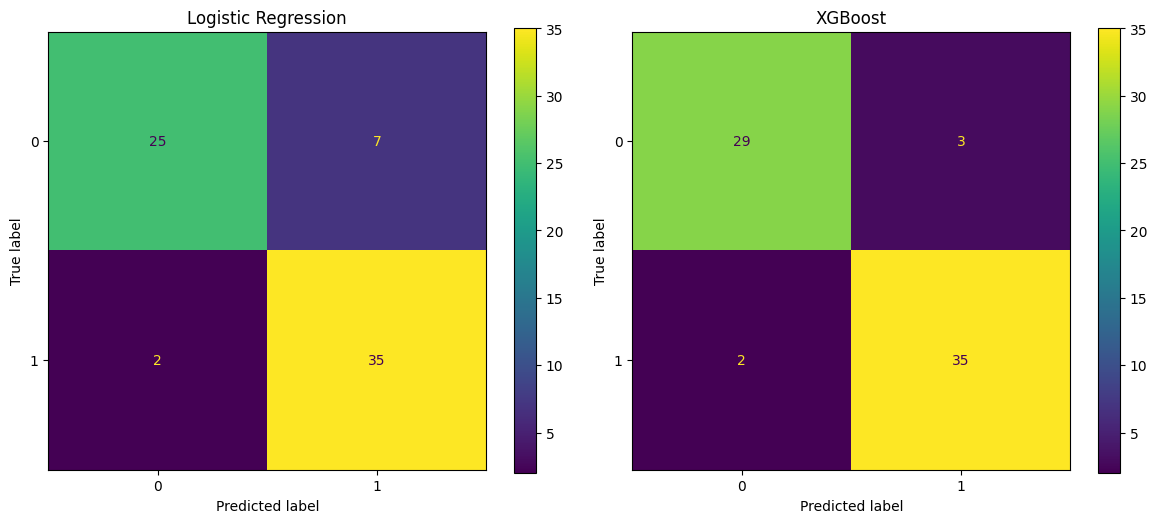

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axs[0])
axs[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axs[1])
axs[1].set_title("XGBoost")

plt.tight_layout()
plt.show()


### CONFUSION MATRIX

1. LINEAR REGG:  
    TN: 25 --> Correctly predicted humans.  
    FP: 7 --> Predicted bots, but were actually humans.  
    FN: 2 --> Predicted humans, but were actually bots.  
    TP: 35 --> Correctly predicted bots.  

2. XGBoost  
    TN: 29 --> Correctly identified humans.  
    FP: 3 --> Fewer humans misclassified as bots.  
    FN: 1 --> Fewer bots missed.  
    TP: 36 --> Bots correctly detected.  
XGBoost is more precise and reliable, making fewer mistakes than Logistic Regression.

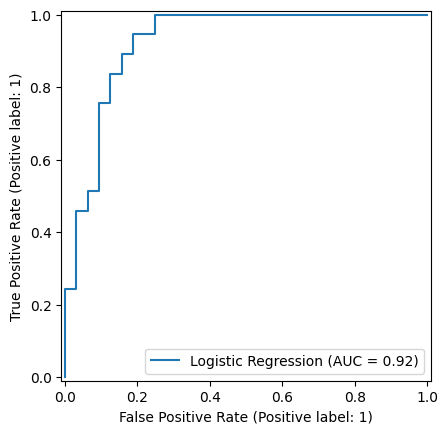

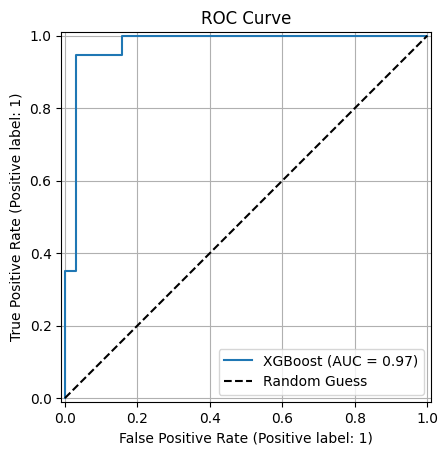

In [151]:
RocCurveDisplay.from_predictions(y_test, y_prob_lr, name="Logistic Regression")
RocCurveDisplay.from_predictions(y_test, y_prob_xgb, name="XGBoost")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curve")
plt.grid()
plt.legend()
plt.show()


<Figure size 1000x800 with 0 Axes>

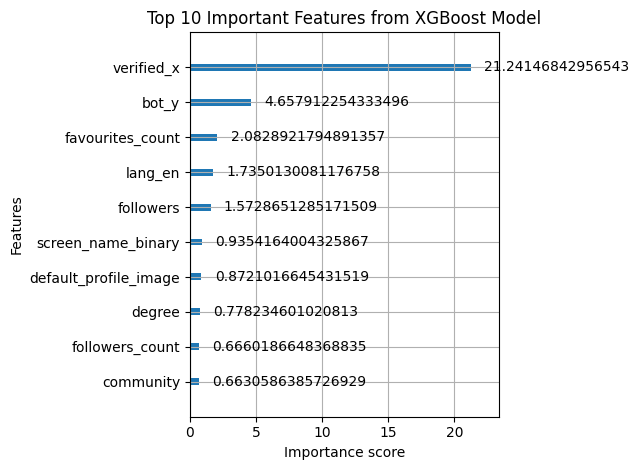

In [152]:
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title("Top 10 Important Features from XGBoost Model")
plt.tight_layout()
plt.show()


CONCLUSION:  
XGBoost Outperforms: It gives better results across all metrics. It's especially strong at identifying both bots and humans.  
Graph Features Help: Adding community ID, node degree, centrality, etc., boosted model performance.  
Recall Is Key: Both models are very good at catching bots (recall ≈ 95–97%), which is crucial in real-world bot detection.

### FINDINGS  


### ROC Curves and AUC Scores  

Logistic Regression:  
AUC (Area Under Curve) = 0.93  
Indicates strong model performance.  
Curve is far above the diagonal, which means it distinguishes well between classes.  

XGBoost:  
AUC = 0.97  
Even better than logistic regression.  
Very close to perfect classification.  

AUC close to 1 means better classification.

XGBoost (0.97) outperforms Logistic Regression (0.93) in distinguishing bots vs humans.

